# TensorFlow Classification

## Data

https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes

1. Title: Pima Indians Diabetes Database

2. Sources:
   (a) Original owners: National Institute of Diabetes and Digestive and
                        Kidney Diseases
   (b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
                          Research Center, RMI Group Leader
                          Applied Physics Laboratory
                          The Johns Hopkins University
                          Johns Hopkins Road
                          Laurel, MD 20707
                          (301) 953-6231
   (c) Date received: 9 May 1990

3. Past Usage:
    1. Smith,~J.~W., Everhart,~J.~E., Dickson,~W.~C., Knowler,~W.~C., \&
       Johannes,~R.~S. (1988). Using the ADAP learning algorithm to forecast
       the onset of diabetes mellitus.  In {\it Proceedings of the Symposium
       on Computer Applications and Medical Care} (pp. 261--265).  IEEE
       Computer Society Press.

       The diagnostic, binary-valued variable investigated is whether the
       patient shows signs of diabetes according to World Health Organization
       criteria (i.e., if the 2 hour post-load plasma glucose was at least 
       200 mg/dl at any survey  examination or if found during routine medical
       care).   The population lives near Phoenix, Arizona, USA.

       Results: Their ADAP algorithm makes a real-valued prediction between
       0 and 1.  This was transformed into a binary decision using a cutoff of 
       0.448.  Using 576 training instances, the sensitivity and specificity
       of their algorithm was 76% on the remaining 192 instances.

4. Relevant Information:
      Several constraints were placed on the selection of these instances from
      a larger database.  In particular, all patients here are females at
      least 21 years old of Pima Indian heritage.  ADAP is an adaptive learning
      routine that generates and executes digital analogs of perceptron-like
      devices.  It is a unique algorithm; see the paper for details.

5. Number of Instances: 768

6. Number of Attributes: 8 plus class 

    7. For Each Attribute: (all numeric-valued)
       1. Number of times pregnant
       2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
       3. Diastolic blood pressure (mm Hg)
       4. Triceps skin fold thickness (mm)
       5. 2-Hour serum insulin (mu U/ml)
       6. Body mass index (weight in kg/(height in m)^2)
       7. Diabetes pedigree function
       8. Age (years)
       9. Class variable (0 or 1)

8. Missing Attribute Values: Yes

9. Class Distribution: (class value 1 is interpreted as "tested positive for
   diabetes")

   Class Value  Number of instances
   0            500
   1            268

10. Brief statistical analysis:

        Attribute number:    Mean:   Standard Deviation:
        1.                     3.8     3.4
        2.                   120.9    32.0
        3.                    69.1    19.4
        4.                    20.5    16.0
        5.                    79.8   115.2
        6.                    32.0     7.9
        7.                     0.5     0.3
        8.                    33.2    11.8

In [39]:
import pandas as pd

In [40]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')

In [41]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [42]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [43]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

#Normalize Columns
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()))

In [44]:
import tensorflow as tf

In [45]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [46]:
#Setup continuous value features
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

#Setup categorical values features
#assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])
assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

<function matplotlib.pyplot.show(*args, **kw)>

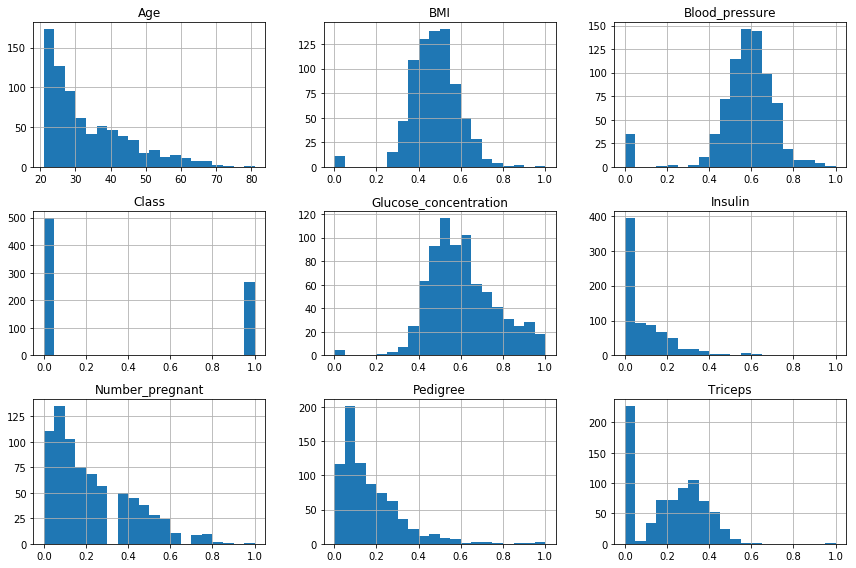

In [47]:
import matplotlib.pyplot as plt

diabetes.hist(bins=20)
plt.tight_layout(rect=(0,0,2,2))
plt.show

In [48]:
#bucket the age data into categorical bins
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,70,80])

In [49]:
feature_columns = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,assigned_group, age_bucket]

In [72]:
#Train test split
x_data = diabetes.drop('Class',axis=1) #features only
labels = diabetes['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.33, random_state=42)

In [73]:
#Build the model
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,
                                                 y=y_train,
                                                 batch_size = 10,
                                                 num_epochs = 1000,
                                                 shuffle = True)

model = tf.estimator.LinearClassifier(feature_columns=feature_columns,
                                     n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/dk/jmp2jdj96xd00z6w7mbmgvh40000gn/T/tmpjpiz_uht', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0xb24f874e0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [74]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/dk/jmp2jdj96xd00z6w7mbmgvh40000gn/T/tmpjpiz_uht/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 309.247
INFO:tensorflow:loss = 7.2840996, step = 101 (0.324 sec)
INFO:tensorflow:global_step/sec: 592.651
INFO:tensorflow:loss = 7.830908, step = 201 (0.169 sec)
INFO:tensorflow:global_step/sec: 625.392
INFO:tensorflow:loss = 3.0855052, step = 301 (0.160 sec)
INFO:tensorflow:global_step/sec: 636.46
INFO:tensorflow:loss = 6.1106224, step = 401 (0.157 sec)
INFO:tensorflow:global_step/sec: 574.802
INFO:tensorflow:loss = 4.671876, step = 501 (0.174 sec)
INFO:tensorflow:global_step/sec:

In [78]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y = y_test,
                                                     batch_size = 10,
                                                     num_epochs = 1,
                                                     shuffle = False)

results = model.evaluate(eval_input_func)
results

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-02-12-03:50:37
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/dk/jmp2jdj96xd00z6w7mbmgvh40000gn/T/tmpjpiz_uht/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-02-12-03:50:37
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.71653545, accuracy_baseline = 0.66141737, auc = 0.7568868, auc_precision_recall = 0.58925986, average_loss = 0.54817355, global_step = 1000, label/mean = 0.33858266, loss = 5.355234, precision = 0.5875, prediction/mean = 0.3626996, recall = 0.54651165
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/dk/jmp2jdj96xd00z6w7mbmgvh40000gn/T/tmpjpiz_uht/model.ckpt-1000


{'accuracy': 0.71653545,
 'accuracy_baseline': 0.66141737,
 'auc': 0.7568868,
 'auc_precision_recall': 0.58925986,
 'average_loss': 0.54817355,
 'label/mean': 0.33858266,
 'loss': 5.355234,
 'precision': 0.5875,
 'prediction/mean': 0.3626996,
 'recall': 0.54651165,
 'global_step': 1000}

In [83]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x = X_train,
                                                     batch_size = 10,
                                                     num_epochs = 1,
                                                     shuffle=False)
predictions = list(model.predict(pred_input_func))
predictions

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/dk/jmp2jdj96xd00z6w7mbmgvh40000gn/T/tmpjpiz_uht/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([-0.600947], dtype=float32),
  'logistic': array([0.35412708], dtype=float32),
  'probabilities': array([0.64587295, 0.35412708], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([0.782601], dtype=float32),
  'logistic': array([0.6862404], dtype=float32),
  'probabilities': array([0.31375957, 0.6862404 ], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-0.33484286], dtype=float32),
  'logistic': array([0.41706273], dtype=float32),
  'probabilities': array([0.58293724, 0.41706276], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.02850318], dtype=float32),
  'logistic': array([0.49287468], dtype=float32),
  'probabilities': array([0.5071253 , 0.49287468], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.0037636], dtype=float32),
  'logistic': 

## DNN Model

In [96]:
#Create embedding columns
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4)

#Re-assign feature columns
feature_columns = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,embedded_group_col, age_bucket]

#Build Model
input_func = tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size = 12, num_epochs=1000, shuffle= True)

dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/dk/jmp2jdj96xd00z6w7mbmgvh40000gn/T/tmpyujpym6p', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a260ed668>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [97]:
#train the model
dnn_model.train(input_fn=input_func, steps = 1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/dk/jmp2jdj96xd00z6w7mbmgvh40000gn/T/tmpyujpym6p/model.ckpt.
INFO:tensorflow:loss = 7.8037806, step = 1
INFO:tensorflow:global_step/sec: 339.81
INFO:tensorflow:loss = 6.5387535, step = 101 (0.296 sec)
INFO:tensorflow:global_step/sec: 603.785
INFO:tensorflow:loss = 8.15297, step = 201 (0.166 sec)
INFO:tensorflow:global_step/sec: 532.419
INFO:tensorflow:loss = 5.311739, step = 301 (0.186 sec)
INFO:tensorflow:global_step/sec: 554.308
INFO:tensorflow:loss = 3.4534025, step = 401 (0.181 sec)
INFO:tensorflow:global_step/sec: 598.477
INFO:tensorflow:loss = 3.6709847, step = 501 (0.170 sec)
INFO:tensorflow:global_step/sec: 558.622
INFO:tensorflow:loss = 7.7553234, step = 601 (0.175 sec)
INFO:tensorflow:g

In [98]:
#test model
eval_input_func = tf.estimator.inputs.pandas_input_fn(X_test,y_test, batch_size=10, num_epochs = 1, shuffle = False)

results = dnn_model.evaluate(eval_input_func)
results

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-02-12-04:01:20
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/dk/jmp2jdj96xd00z6w7mbmgvh40000gn/T/tmpyujpym6p/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-02-12-04:01:20
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7598425, accuracy_baseline = 0.66141737, auc = 0.813642, auc_precision_recall = 0.64880025, average_loss = 0.5039056, global_step = 1000, label/mean = 0.33858266, loss = 4.92277, precision = 0.64044946, prediction/mean = 0.36582595, recall = 0.6627907
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/dk/jmp2jdj96xd00z6w7mbmgvh40000gn/T/tmpyujpym6p/model.ckpt-1000


{'accuracy': 0.7598425,
 'accuracy_baseline': 0.66141737,
 'auc': 0.813642,
 'auc_precision_recall': 0.64880025,
 'average_loss': 0.5039056,
 'label/mean': 0.33858266,
 'loss': 4.92277,
 'precision': 0.64044946,
 'prediction/mean': 0.36582595,
 'recall': 0.6627907,
 'global_step': 1000}